# Data Divas Progress Report

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tabulate import tabulate

## Base Data Cleaning

In [2]:
mat_df = pd.read_csv('./student-mat.csv', sep=';')
por_df = pd.read_csv('./student-por.csv', sep=';')

por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [3]:
mat_df.insert(1, 'class', 'mat')
por_df.insert(1, 'class', 'por')
df = pd.concat([mat_df, por_df], axis=0)

In [4]:
df.drop(['G1', 'G2'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   class       1044 non-null   object
 2   sex         1044 non-null   object
 3   age         1044 non-null   int64 
 4   address     1044 non-null   object
 5   famsize     1044 non-null   object
 6   Pstatus     1044 non-null   object
 7   Medu        1044 non-null   int64 
 8   Fedu        1044 non-null   int64 
 9   Mjob        1044 non-null   object
 10  Fjob        1044 non-null   object
 11  reason      1044 non-null   object
 12  guardian    1044 non-null   object
 13  traveltime  1044 non-null   int64 
 14  studytime   1044 non-null   int64 
 15  failures    1044 non-null   int64 
 16  schoolsup   1044 non-null   object
 17  famsup      1044 non-null   object
 18  paid        1044 non-null   object
 19  activities  1044 non-null   object
 20  nursery  

## 2.1 Data Quality Reports

In [5]:
cat_features = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 
                'schoolsup' ,'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
cont_features = ['age', 'absences', 'G3']

cat_df = df[cat_features]
cont_df = df[cont_features]

In [6]:
# Cat. Feature Data Quality Report
# Feature feature
cat_dq_report = pd.DataFrame(cat_df.columns.values)
cat_dq_report.columns = ['Feature']
cat_dq_report = cat_dq_report.reindex(columns = cat_dq_report.columns.tolist() + 
                                      ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode %'])

# Count feature
cat_dq_report['Count'] = cat_df.shape[0]

for i, feature in enumerate(cat_dq_report['Feature']):
    cat_dq_report.iloc[i:i+1, 2] = cat_df[feature].isna().sum() / cat_df.shape[0] # Miss %
    
    mode_info_df =  cat_df[feature].value_counts().reset_index()
    
    cat_dq_report.iloc[i:i+1, 3] = mode_info_df['index'].shape[0] # Card. feature
    cat_dq_report.iloc[i:i+1, 4] = mode_info_df.at[0, 'index'] # Mode
    cat_dq_report.iloc[i:i+1, 5] = mode_info_df.at[0, feature] # Mode Freq.
    cat_dq_report.iloc[i:i+1, 7] = mode_info_df.at[1, 'index'] # 2nd Mode
    cat_dq_report.iloc[i:i+1, 8] = mode_info_df.at[1, feature] # 2nd Mode Freq.

# Deriving mode % for first and second mode
cat_dq_report['Mode %'] = cat_dq_report['Mode Freq.'] / cat_dq_report['Count'] * 100
cat_dq_report['2nd Mode %'] = cat_dq_report['2nd Mode Freq.'] / cat_dq_report['Count'] * 100

cat_dq_report.head()

,Feature,Count,Miss %,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %
0,school,1044,0.0,2.0,GP,772.0,73.946360,MS,272.0,26.053640
1,class,1044,0.0,2.0,por,649.0,62.164751,mat,395.0,37.835249
2,sex,1044,0.0,2.0,F,591.0,56.609195,M,453.0,43.390805
3,address,1044,0.0,2.0,U,759.0,72.701149,R,285.0,27.298851
4,famsize,1044,0.0,2.0,GT3,738.0,70.689655,LE3,306.0,29.310345


In [7]:
# Cont. Feature Data Quality Report
# Feature feature
cont_dq_report = pd.DataFrame(cont_df.columns.values)
cont_dq_report.columns = ['Feature']

cont_desc = cont_df[cont_dq_report['Feature']].describe()

# Turning rows of cont_desc into columns of our data quality report
for i, row in enumerate(list(cont_desc.index.values)):
    cont_dq_report[row] = cont_desc[i:i+1][:].T.values

cont_dq_report['% Miss.'] = 0
for i, feature in enumerate(cont_dq_report['Feature']):
    cont_dq_report.iloc[i:i+1, 9] = cont_df[feature].isna().sum() / cont_df.shape[0] # Miss %

# Cardinality feature
cont_dq_report['Card.'] = df[cont_dq_report['Feature']].nunique().values

cont_dq_report = cont_dq_report[['Feature', 'count', '% Miss.', 'Card.', 'min', '25%', 'mean', '50%', '75%', 'max', 'std']]
cont_dq_report.rename({'count': 'Count', 'min': 'Min.', '25%': '1st Qrt.', 'mean': 'Mean', '50%': 'Median', '75%': '3rd Qrt.', 'max': 'Max.', 'std': 'Std. Dev.'}, axis=1, inplace=True)

cont_dq_report.head()

,Feature,Count,% Miss.,Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
0,age,1044.0,0,8,15.0,16.0,16.726054,17.0,18.0,22.0,1.239975
1,absences,1044.0,0,35,0.0,0.0,4.434866,2.0,6.0,75.0,6.210017
2,G3,1044.0,0,19,0.0,10.0,11.341954,11.0,14.0,20.0,3.864796


## 2.1.2 Data Visualizations 

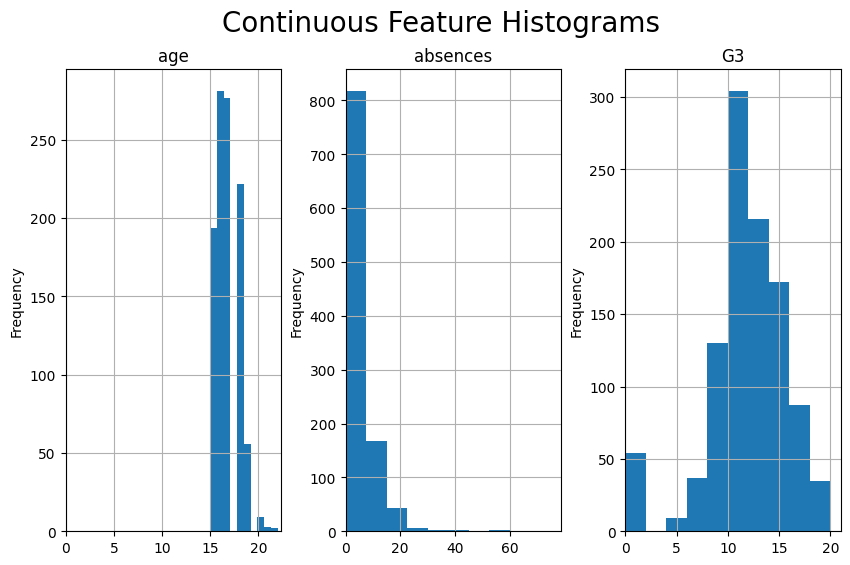

In [8]:
# Continuous Feature Histograms
fig, axes = plt.subplots(1, 3, figsize=(10,6))

fig.suptitle("Continuous Feature Histograms", fontsize=20)
for i, feature in enumerate(cont_features):
    cont_df.hist(feature, ax=axes[i])
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(xmin=0)

plt.show()

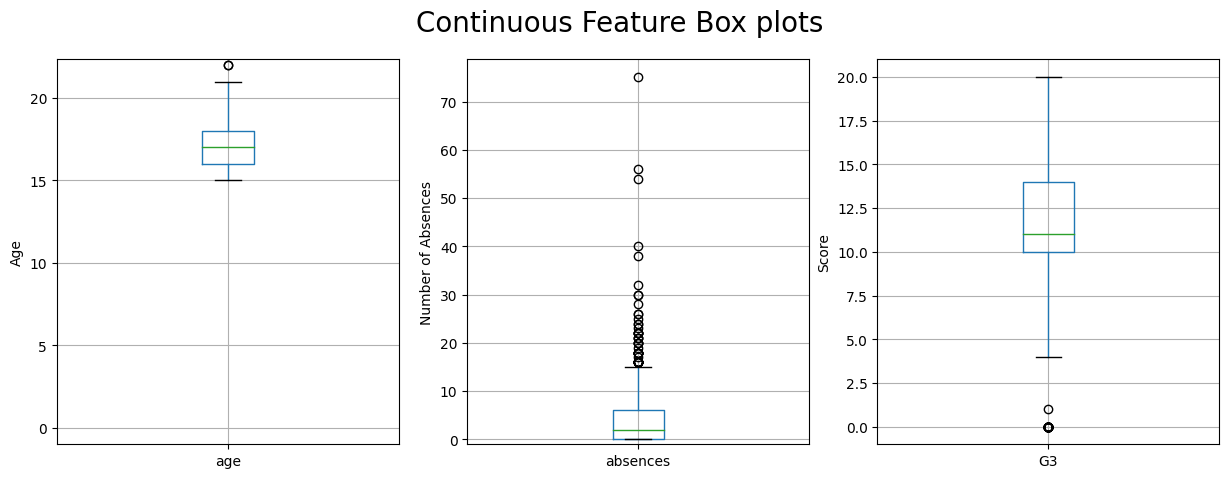

In [9]:
# Continuous Feature Box Plots
fig, axes = plt.subplots(1, 3, figsize=(15,5))
plt.suptitle('Continuous Feature Box plots', fontsize=20)

for i, feature in enumerate(cont_features):
    cont_df.boxplot(feature, ax=axes[i])
    axes[i].set_ylim(ymin=-1)

axes[0].set_ylabel('Age')
axes[1].set_ylabel('Number of Absences')
axes[2].set_ylabel('Score')

plt.show()

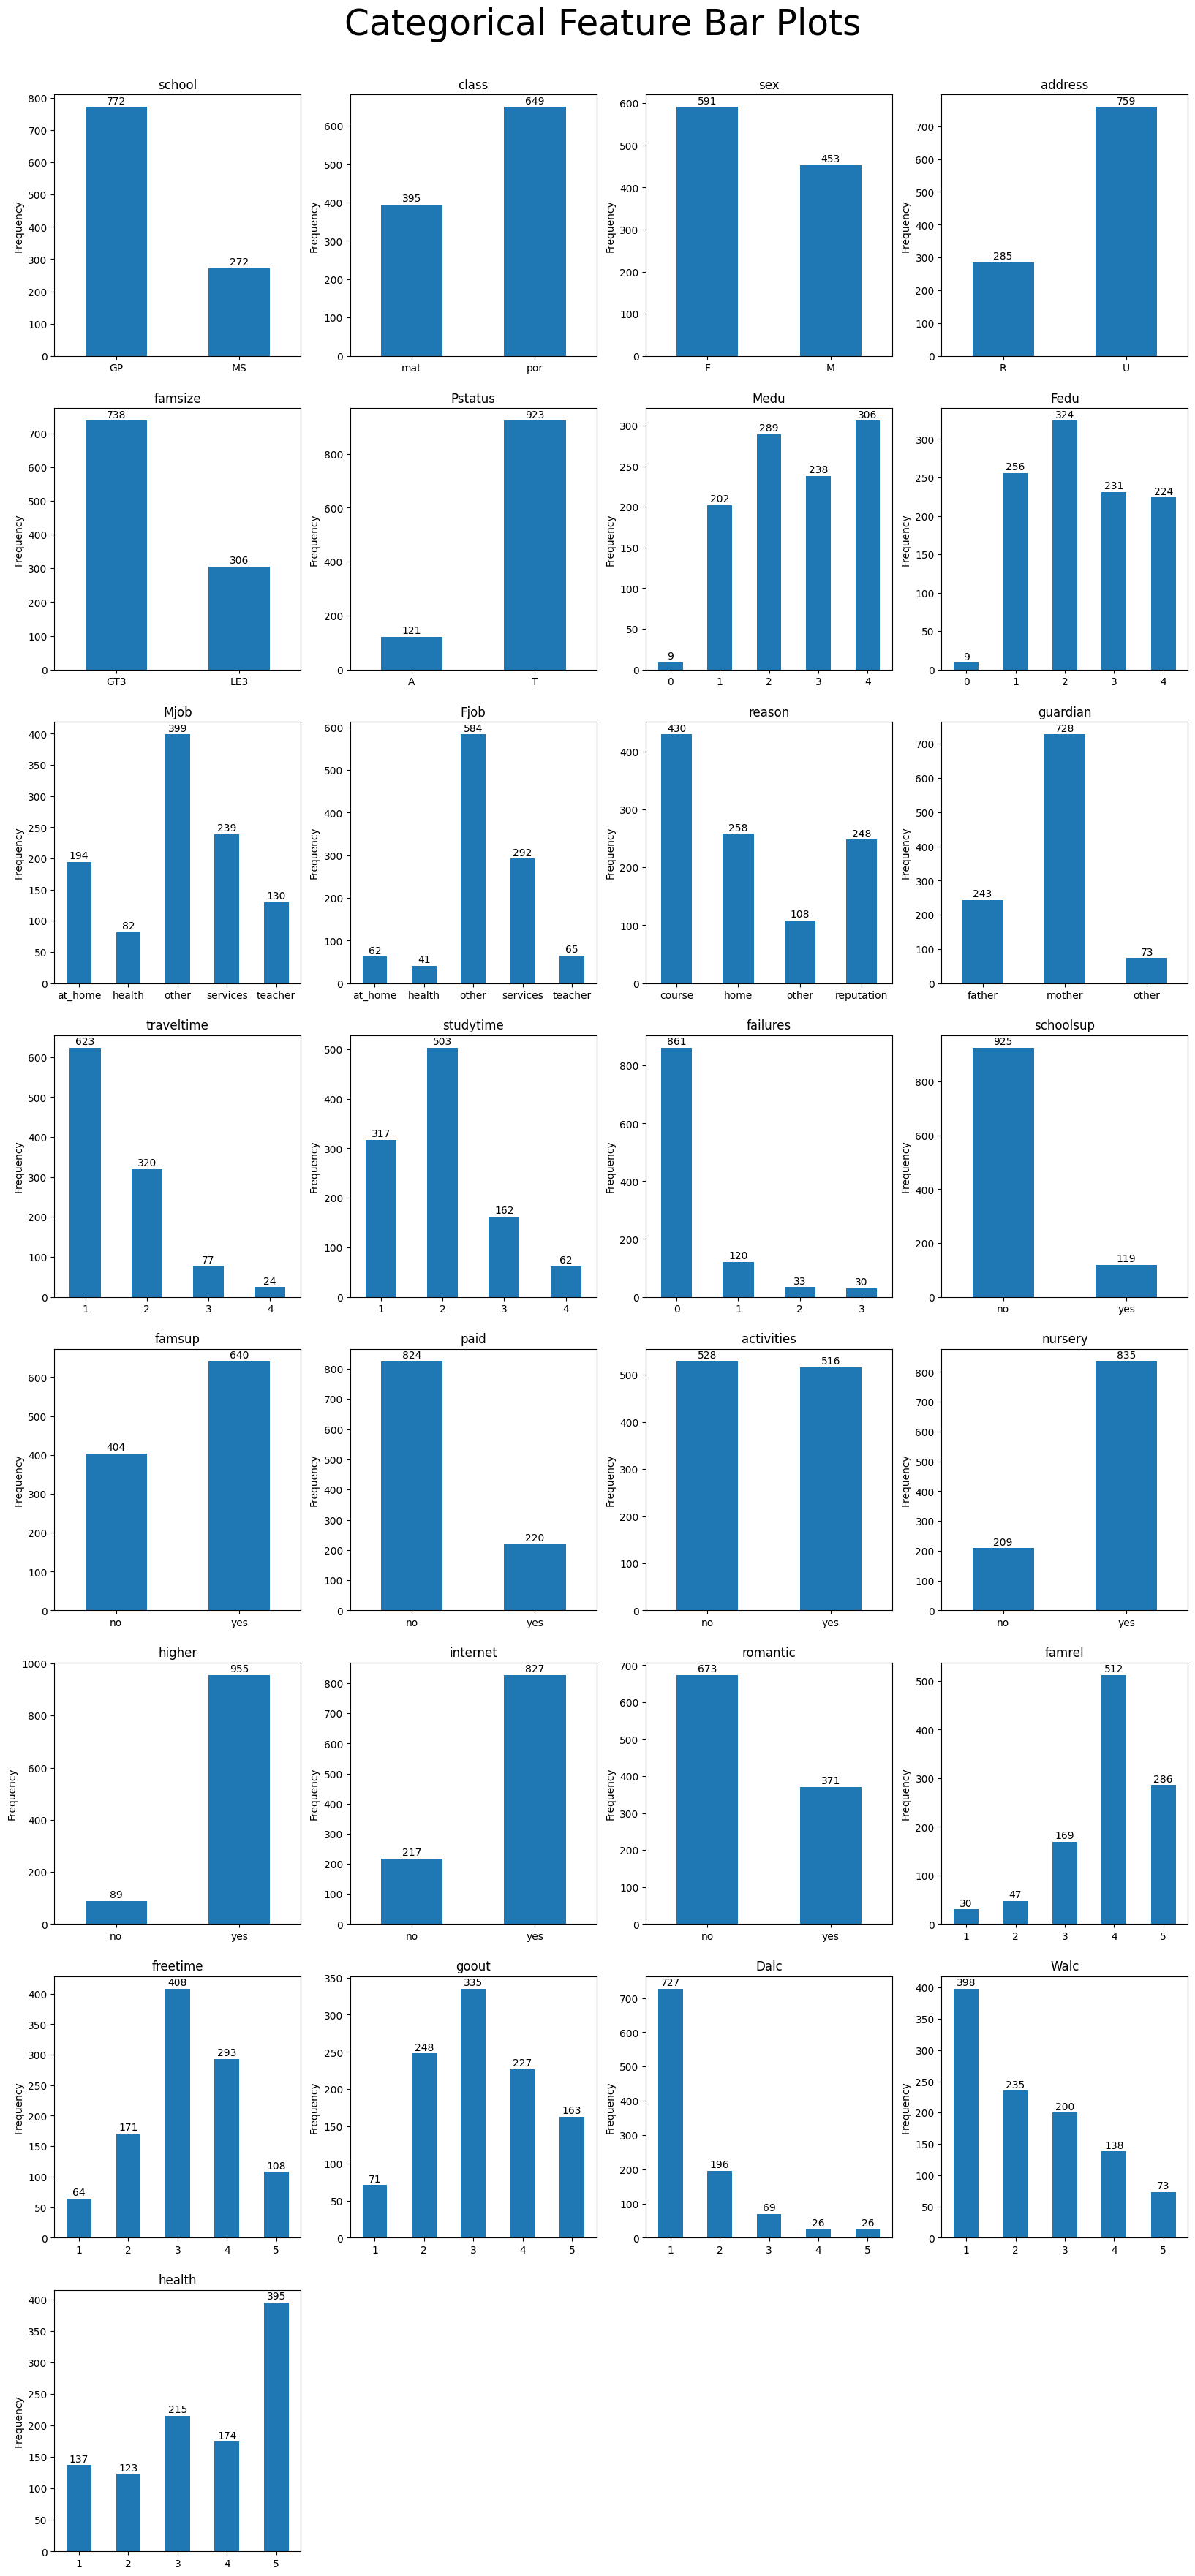

In [10]:
# Categorical Feature Bar Plots
fig = plt.figure(figsize=(20, 40))

fig.suptitle("Categorical Feature Bar Plots", fontsize=35)
# Adjusting white space under title
fig.tight_layout()
fig.subplots_adjust(top=0.95)

for i in range(1,30):
    ax = fig.add_subplot(8, 4, i)
    feature = cat_features[i-1]
    plt.title(feature)
    ax = cat_df[feature].value_counts().sort_index().plot(kind='bar') # sort_index so that ordinal values are in order
    plt.xticks(rotation=0)
    plt.ylabel('Frequency')
    # Adds frequencies above each bar
    for bar in ax.patches:
        # Get X and Y placement of label of bar
        y_val = bar.get_height()
        x_val = bar.get_x() + bar.get_width() / 2
        label = "{:.0f}".format(y_val)

        # Create annotation
        ax.annotate(label, (x_val, y_val), 
            xytext=(0, 1), textcoords="offset points", ha='center', va='bottom')

plt.show()

# ?

In [11]:
# headers of features

#headers = ["test preparation course","math score","reading score","writing score", "gender","race/ethnicity","parental level of education",
#"lunch"]

In [12]:
# prints out the object feature test prep course and converts to boolean 

#printTrue = df['test preparation course'] = df['test preparation course'].replace(['completed'], True)
#printFalse = df['test preparation course'] = df['test preparation course'].replace(['none'], False)


In [13]:
#df['test preparation course'].astype('int8')

# drop ID
#df = df.iloc[: , 1:]

## One-Hot Encoded Data

In [14]:
# one-hot encoded data: gender, ethnicity, education, lunch

one_hot_encoded_data = pd.get_dummies(df, columns = ['school', 'class', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
print(tabulate(one_hot_encoded_data, headers = "keys", tablefmt='fancy_grid'))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Missing Values and Outliers

### Normalization

In [15]:
# normalize the code
from sklearn.preprocessing import MinMaxScaler

df_sklearn = df.copy()

columns = 'age'
df_sklearn[columns] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns]).reshape(-1,1))

columns2 = 'famrel'
df_sklearn[columns2] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns2]).reshape(-1,1))

columns3 = 'freetime'
df_sklearn[columns3] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns3]).reshape(-1,1))

columns4 = 'goout'
df_sklearn[columns4] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns4]).reshape(-1,1))

columns5 = 'Walc'
df_sklearn[columns5] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns5]).reshape(-1,1))

columns6 = 'health'
df_sklearn[columns6] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns6]).reshape(-1,1))

columns7 = 'absences'
df_sklearn[columns7] = MinMaxScaler().fit_transform(np.array(df_sklearn[columns7]).reshape(-1,1))

# view normalized data  
display(df_sklearn)
 

,school,class,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,mat,F,0.428571,U,GT3,A,4,4,at_home,...,no,no,0.75,0.50,0.75,1,0.00,0.50,0.080000,6
1,GP,mat,F,0.285714,U,GT3,T,1,1,at_home,...,yes,no,1.00,0.50,0.50,1,0.00,0.50,0.053333,6
2,GP,mat,F,0.000000,U,LE3,T,1,1,at_home,...,yes,no,0.75,0.50,0.25,2,0.50,0.50,0.133333,10
3,GP,mat,F,0.000000,U,GT3,T,4,2,health,...,yes,yes,0.50,0.25,0.25,1,0.00,1.00,0.026667,15
4,GP,mat,F,0.142857,U,GT3,T,3,3,other,...,no,no,0.75,0.50,0.25,1,0.25,1.00,0.053333,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,por,F,0.571429,R,GT3,T,2,3,services,...,yes,no,1.00,0.75,0.25,1,0.25,1.00,0.053333,10
645,MS,por,F,0.428571,U,LE3,T,3,1,teacher,...,yes,no,0.75,0.50,0.75,1,0.00,0.00,0.053333,16
646,MS,por,F,0.428571,U,GT3,T,1,1,other,...,no,no,0.00,0.00,0.00,1,0.00,1.00,0.080000,9
647,MS,por,M,0.285714,U,LE3,T,3,1,services,...,yes,no,0.25,0.75,1.00,3,0.75,0.25,0.080000,10


In [16]:
# turn categorical info into binary

binary1 = pd.get_dummies(df_sklearn)
binary1.to_csv('student_data.csv')

display (binary1)


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.428571,4,4,2,2,0,0.75,0.50,0.75,1,...,1,0,0,1,0,1,1,0,1,0
1,0.285714,1,1,1,2,0,1.00,0.50,0.50,1,...,1,0,1,0,0,1,0,1,1,0
2,0.000000,1,1,1,2,3,0.75,0.50,0.25,2,...,1,0,0,1,0,1,0,1,1,0
3,0.000000,4,2,1,3,0,0.50,0.25,0.25,1,...,0,1,0,1,0,1,0,1,0,1
4,0.142857,3,3,1,2,0,0.75,0.50,0.25,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0.571429,2,3,1,3,1,1.00,0.75,0.25,1,...,0,1,1,0,0,1,0,1,1,0
645,0.428571,3,1,1,2,0,0.75,0.50,0.75,1,...,1,0,0,1,0,1,0,1,1,0
646,0.428571,1,1,2,2,0,0.00,0.00,0.00,1,...,0,1,0,1,0,1,1,0,1,0
647,0.285714,3,1,2,1,0,0.25,0.75,1.00,3,...,1,0,1,0,0,1,0,1,1,0


### Remove Outliers

In [17]:
#removes outliers to whatever std deviation you want 
#outliers_rm_df = pd.get_dummies(df_sklearn)
#std_deviation = 3
#outliers_rm_df[outliers_rm_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < std_deviation).all(axis=1)]

### Transformations

### Selecting Features